In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

wdf = pd.read_csv('weatherMonroe.csv', low_memory=False)
wdf

,STATION,NAME,DATE,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,USC00455525,"MONROE, WA US",1997-01-01,NaN,NaN,0.83,0.0,0.0,56.0,43.0,43.0
1,USC00455525,"MONROE, WA US",1997-01-02,NaN,NaN,0.68,0.0,0.0,51.0,43.0,45.0
2,USC00455525,"MONROE, WA US",1997-01-03,NaN,NaN,0.60,0.0,0.0,45.0,37.0,37.0
3,USC00455525,"MONROE, WA US",1997-01-04,NaN,NaN,0.01,0.0,0.0,40.0,37.0,38.0
4,USC00455525,"MONROE, WA US",1997-01-05,NaN,NaN,0.00,0.0,0.0,42.0,34.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...
8674,USC00455525,"MONROE, WA US",2021-06-22,NaN,NaN,0.00,0.0,0.0,79.0,55.0,70.0
8675,USC00455525,"MONROE, WA US",2021-06-23,NaN,NaN,0.00,0.0,0.0,75.0,54.0,68.0
8676,USC00455525,"MONROE, WA US",2021-06-24,NaN,NaN,0.00,0.0,0.0,79.0,54.0,71.0
8677,USC00455525,"MONROE, WA US",2021-06-25,NaN,NaN,0.00,0.0,0.0,83.0,56.0,80.0


In [2]:
# wdf = wdf.drop(['NAME','MDPR','MDSF','STATION'], axis=1)
wdf = wdf.rename(columns={'DATE':'Date'})
wdf['Date'] = wdf['Date'].astype('datetime64[ns]')

wdf

,STATION,NAME,Date,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS
0,USC00455525,"MONROE, WA US",1997-01-01,NaN,NaN,0.83,0.0,0.0,56.0,43.0,43.0
1,USC00455525,"MONROE, WA US",1997-01-02,NaN,NaN,0.68,0.0,0.0,51.0,43.0,45.0
2,USC00455525,"MONROE, WA US",1997-01-03,NaN,NaN,0.60,0.0,0.0,45.0,37.0,37.0
3,USC00455525,"MONROE, WA US",1997-01-04,NaN,NaN,0.01,0.0,0.0,40.0,37.0,38.0
4,USC00455525,"MONROE, WA US",1997-01-05,NaN,NaN,0.00,0.0,0.0,42.0,34.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...
8674,USC00455525,"MONROE, WA US",2021-06-22,NaN,NaN,0.00,0.0,0.0,79.0,55.0,70.0
8675,USC00455525,"MONROE, WA US",2021-06-23,NaN,NaN,0.00,0.0,0.0,75.0,54.0,68.0
8676,USC00455525,"MONROE, WA US",2021-06-24,NaN,NaN,0.00,0.0,0.0,79.0,54.0,71.0
8677,USC00455525,"MONROE, WA US",2021-06-25,NaN,NaN,0.00,0.0,0.0,83.0,56.0,80.0


In [77]:
#Create df from hatchery file
esc = pd.read_csv('skykomishHatcheries.csv', low_memory=False)
esc['Date'] = pd.to_datetime(esc['Date'])
esc = esc[['Date', 'Facility', 'Adult Count', 'Species', 'Event']]
esc = esc[esc.Facility == 'WALLACE R HATCHERY']
esc = esc[esc.Event == 'Trap Estimate']
esc = esc[esc.Species == 'Steelhead']
esc = esc.sort_values('Date')



#Creat df from rivers file
df = pd.read_csv('sky.txt', sep='\t', header=None)
df = df.rename(columns ={2:"Date",3:"cfs"})
df = df.drop(columns=[0,1,4],)
df['Date'] = df['Date'].astype('datetime64[ns]')
df.head()

#Specify date range for each species
df_time = esc
first = df_time.iloc[0].Date
last = df_time.iloc[-1].Date
print(first, last)

#Merge data frames and trim for species date range
plt_tst = pd.merge(df, esc, on=['Date'], how='outer')
rt = (plt_tst['Date'] >= first) & (plt_tst['Date'] <= last)
plt_tst = plt_tst.loc[rt]
plt_tst['Year'] = plt_tst['Date'].dt.strftime('%Y').astype(np.int64)
plt_tst = plt_tst[plt_tst.Year >= 2015]
plt_tst.info()
plt_tst['Adult Count'] = plt_tst['Adult Count'].fillna(0).astype(np.int64)
plt_tst['returnBinary'] = plt_tst['Adult Count'].astype(np.int64)
plt_tst.loc[plt_tst.returnBinary > 0, 'returnBinary'] = 1
plt_tst.info()
plt_tst.tail()

#Calculate percent of total return
tf = plt_tst.groupby('Year').sum('Adult Count')
sf = plt_tst.set_index('Year')
sf = sf.merge(tf, on='Year')
sf = sf[['Adult Count_x', 'cfs_x','Date','returnBinary_y', 'Adult Count_y','returnBinary_x']]
sf = sf.rename(columns = {'Adult Count_x':'Count', 'cfs_x':'cfs','returnBinary_y':'#obsv','returnBinary_x':'returnBinary','Adult Count_y':'yearTotal'})
sf['%total'] = sf.Count/sf.yearTotal
sf = sf.set_index('Date') 
sf

2000-10-10 00:00:00 2021-06-08 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 6397 to 8759
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2363 non-null   datetime64[ns]
 1   cfs          2363 non-null   int64         
 2   Facility     430 non-null    object        
 3   Adult Count  430 non-null    float64       
 4   Species      430 non-null    object        
 5   Event        430 non-null    object        
 6   Year         2363 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 147.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2363 entries, 6397 to 8759
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2363 non-null   datetime64[ns]
 1   cfs           2363 non-null   int64         
 2   Facility     

,Count,cfs,#obsv,yearTotal,returnBinary,%total
Date,,,,,,
2015-01-01,0,2920,93,991,0,0.000000
2015-01-02,1,2720,93,991,1,0.001009
2015-01-03,4,2520,93,991,1,0.004036
2015-01-04,0,2680,93,991,0,0.000000
2015-01-05,0,21400,93,991,0,0.000000
...,...,...,...,...,...,...
2021-06-04,5,12600,7,47,1,0.106383
2021-06-05,5,10600,7,47,1,0.106383
2021-06-06,0,9490,7,47,0,0.000000


In [78]:
mdf = pd.merge(sf, wdf, on=['Date'], how='outer')
mdf['Year'] = mdf['Date'].dt.strftime('%Y').astype(np.int64)
mdf = mdf[mdf.Year == 2017]
mdf = mdf.set_index('Date')
mdf

,Count,cfs,#obsv,yearTotal,returnBinary,%total,STATION,NAME,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,Year
Date,,,,,,,,,,,,,,,,,
2017-01-01,0.0,1790.0,62.0,521.0,0.0,0.000000,USC00455525,"MONROE, WA US",NaN,NaN,0.30,NaN,NaN,33.0,26.0,29.0,2017
2017-01-02,0.0,1620.0,62.0,521.0,0.0,0.000000,USC00455525,"MONROE, WA US",NaN,NaN,0.00,NaN,NaN,32.0,24.0,24.0,2017
2017-01-03,0.0,1470.0,62.0,521.0,0.0,0.000000,USC00455525,"MONROE, WA US",NaN,NaN,0.00,NaN,NaN,31.0,17.0,22.0,2017
2017-01-04,0.0,1340.0,62.0,521.0,0.0,0.000000,USC00455525,"MONROE, WA US",NaN,NaN,0.00,NaN,NaN,34.0,17.0,23.0,2017
2017-01-05,0.0,1270.0,62.0,521.0,0.0,0.000000,USC00455525,"MONROE, WA US",NaN,NaN,0.00,0.0,0.0,36.0,13.0,22.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,0.0,1920.0,62.0,521.0,0.0,0.000000,USC00455525,"MONROE, WA US",NaN,NaN,0.00,0.0,0.0,32.0,29.0,31.0,2017
2017-12-28,15.0,2330.0,62.0,521.0,1.0,0.028791,USC00455525,"MONROE, WA US",NaN,NaN,0.20,0.0,0.0,45.0,30.0,38.0,2017
2017-12-29,20.0,7160.0,62.0,521.0,1.0,0.038388,USC00455525,"MONROE, WA US",NaN,NaN,1.20,0.0,0.0,53.0,38.0,51.0,2017


In [79]:
fig = mdf.corr()
fig

,Count,cfs,#obsv,yearTotal,returnBinary,%total,MDPR,MDSF,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,Year
Count,1.000000,0.290554,NaN,NaN,0.716403,1.000000,NaN,NaN,0.174244,-0.036689,-0.018746,0.064399,0.110634,0.082680,NaN
cfs,0.290554,1.000000,NaN,NaN,0.197327,0.290554,NaN,NaN,0.363436,-0.039513,-0.030920,-0.061814,0.085789,-0.034564,NaN
#obsv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearTotal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
returnBinary,0.716403,0.197327,NaN,NaN,1.000000,0.716403,NaN,NaN,0.190387,-0.049161,0.096817,-0.112005,-0.070171,-0.106494,NaN
%total,1.000000,0.290554,NaN,NaN,0.716403,1.000000,NaN,NaN,0.174244,-0.036689,-0.018746,0.064399,0.110634,0.082680,NaN
MDPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MDSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRCP,0.174244,0.363436,NaN,NaN,0.190387,0.174244,NaN,NaN,1.000000,0.100550,0.060560,-0.301730,-0.090194,-0.238840,NaN
SNOW,-0.036689,-0.039513,NaN,NaN,-0.049161,-0.036689,NaN,NaN,0.100550,1.000000,NaN,-0.151980,-0.136950,-0.142472,NaN


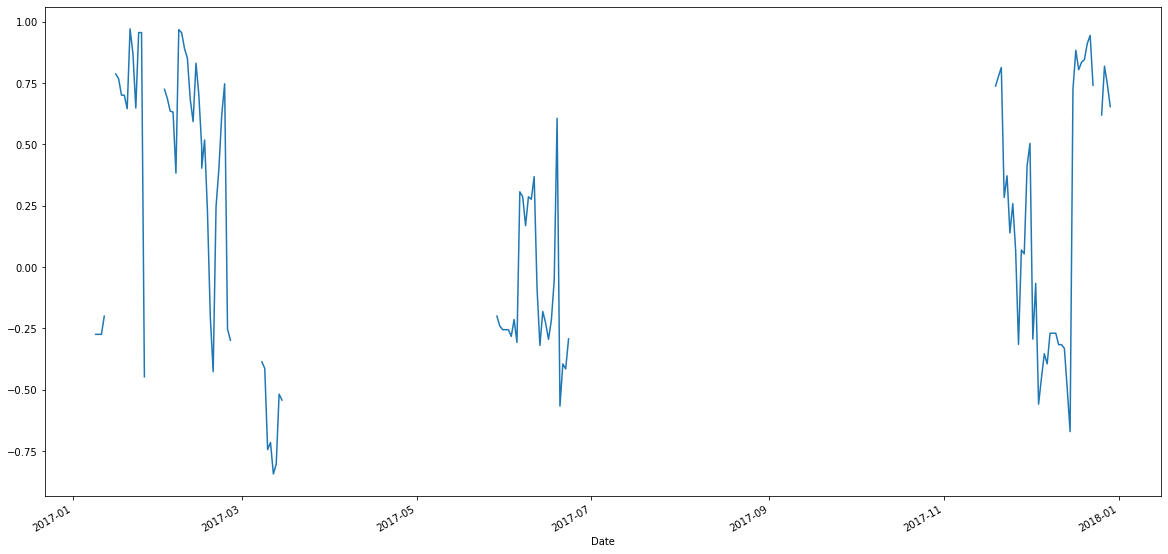

In [80]:
f,ax = plt.subplots(figsize=(20, 10))
rolling_r = mdf['PRCP'].rolling(window=6, center=True).corr(mdf['%total']).plot(ax=ax)

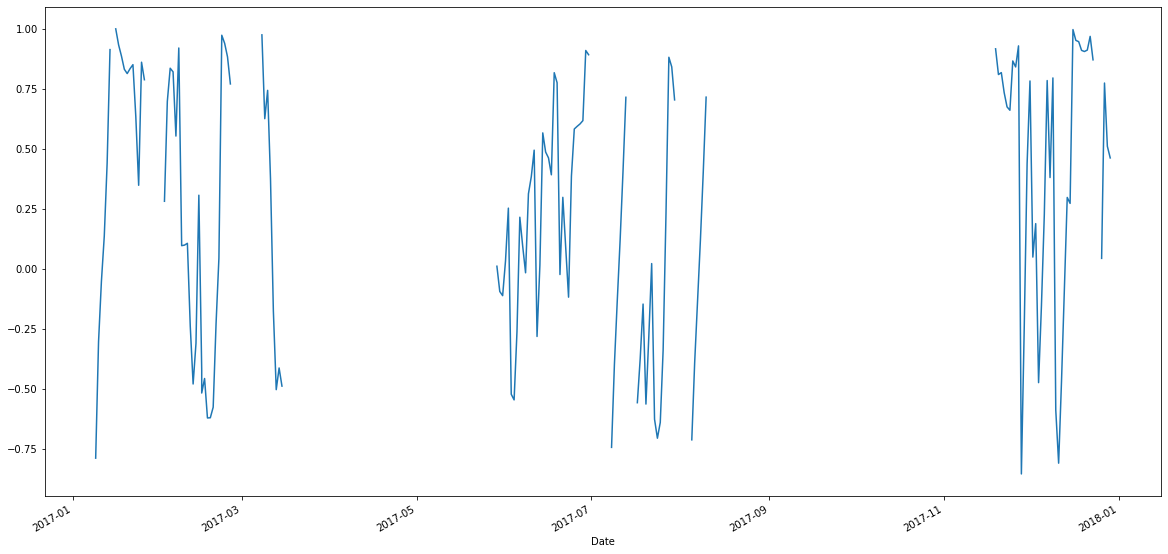

In [81]:
f,ax = plt.subplots(figsize=(20, 10))
rolling_r = mdf['cfs'].rolling(window=6, center=True).corr(mdf['%total']).plot(ax=ax)

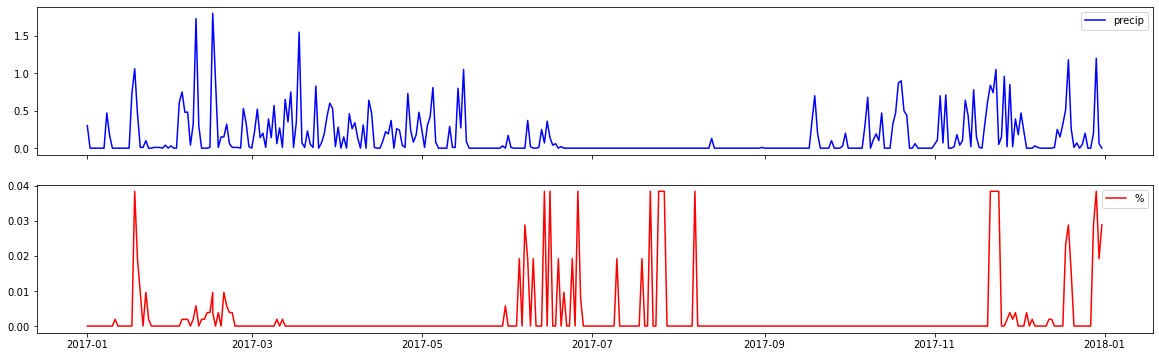

In [82]:
fig, ax = plt.subplots(2, 1, figsize=(20, 6), sharex=True)
ax[0].plot(mdf['PRCP'], color='b', label='precip')
ax[0].legend()
ax[1].plot(mdf['%total'], color='r', label='%')
ax[1].legend()
plt.show()

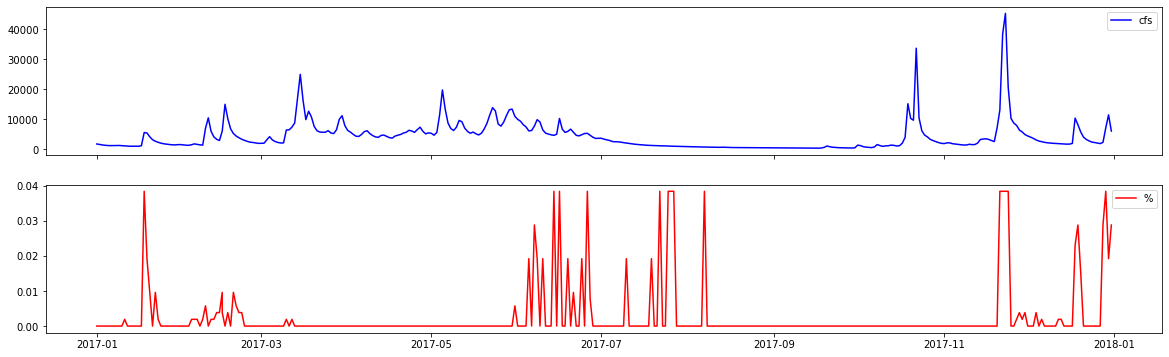

In [83]:
fig, ax = plt.subplots(2, 1, figsize=(20, 6), sharex=True)
ax[0].plot(mdf['cfs'], color='b', label='cfs')
ax[0].legend()
ax[1].plot(mdf['%total'], color='r', label='%')
ax[1].legend()
plt.show()

Text(0.5, 1.0, 'Cross-correlation')

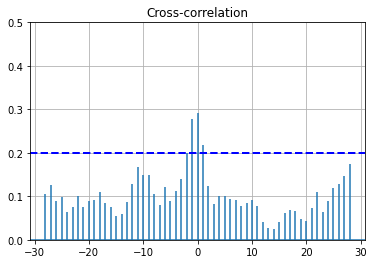

In [84]:
plt.xcorr(mdf['PRCP'], mdf['%total'], usevlines=True, maxlags=28)
plt.grid(True)
plt.axhline(0.2, color='blue', linestyle='dashed', lw=2)
plt.ylim([0, 0.5])
plt.title("Cross-correlation")


Text(0.5, 1.0, 'Cross-correlation')

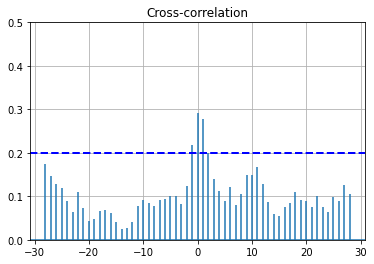

In [85]:
plt.xcorr(mdf['%total'], mdf['PRCP'], usevlines=True, maxlags=28)
plt.grid(True)
plt.axhline(0.2, color='blue', linestyle='dashed', lw=2)
plt.ylim([0, 0.5])
plt.title("Cross-correlation")


Text(0.5, 1.0, 'Cross-correlation')

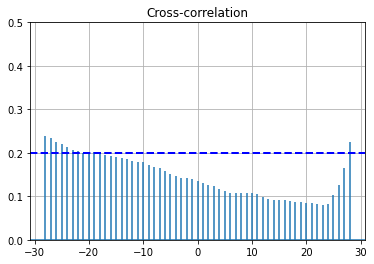

In [76]:
plt.xcorr(mdf['cfs'], mdf['%total'], usevlines=True, maxlags=28)
plt.grid(True)
plt.axhline(0.2, color='blue', linestyle='dashed', lw=2)
plt.ylim([0, 0.5])
plt.title("Cross-correlation")